**Importing Libriaries**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_regression

import tensorflow
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import InputLayer, Dense

**Creating the Dataset**

In [7]:
X, y = make_regression(n_samples=3000, n_features=10, random_state=10)

In [8]:
X.shape

(3000, 10)

**Splitting the Data**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

(2400, 10)
(600, 10)


**Preprocessing**

In [10]:
std = StandardScaler()

X_train = std.fit_transform(X_train)

X_test = std.transform(X_test)

**Logical Structure Building**

In [12]:
model = Sequential()

model.add(InputLayer(shape = (10,)))

model.add(Dense(units=8, activation='sigmoid', use_bias=True))

model.add(Dense(units=6, activation='sigmoid', use_bias=True))

model.add(Dense(units=1, activation='linear', use_bias=True))

**Model Summary**

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149 (596.00 B)

 Trainable params: 149 (596.00 B)

 Non-trainable params: 0 (0.00 B)

**Compiling**

In [17]:
sgd = SGD(learning_rate=0.001)

model.compile(optimizer=sgd, loss = 'mean_squared_error', metrics=['r2_score'])

**Traning**

In [18]:
model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1312.9810 - r2_score: 0.9648 - val_loss: 1801.6627 - val_r2_score: 0.9565
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1289.9227 - r2_score: 0.9653 - val_loss: 1703.2010 - val_r2_score: 0.9589
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2056.9333 - r2_score: 0.9492 - val_loss: 2497.8994 - val_r2_score: 0.9397
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1494.2513 - r2_score: 0.9595 - val_loss: 1681.1172 - val_r2_score: 0.9594
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1194.9778 - r2_score: 0.9679 - val_loss: 1361.3396 - val_r2_score: 0.9671
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 808.9983 - r2_score: 0.9778 - val_loss: 1248.0886 - val_r2_score: 0.9699
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 897.7112 - r2_score: 0.9768 - val_loss: 1180.5645 - val_r2_score: 0.9715
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1214

**Cross Validation**

In [19]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 821.0798 - r2_score: 0.9784 - val_loss: 1135.9194 - val_r2_score: 0.9726
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 736.3951 - r2_score: 0.9798 - val_loss: 1003.1429 - val_r2_score: 0.9758
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1042.7197 - r2_score: 0.9753 - val_loss: 997.2889 - val_r2_score: 0.9759
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1235.5450 - r2_score: 0.9674 - val_loss: 2339.0168 - val_r2_score: 0.9435
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2016.0168 - r2_score: 0.9489 - val_loss: 1808.1918 - val_r2_score: 0.9563
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1923.3658 - r2_score: 0.9498 - val_loss: 2021.9475 - val_r2_score: 0.9512
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1288.0461 - r2_score: 0.9678 - val_loss: 1219.5759 - val_r2_score: 0.9706
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 993.4

In [20]:
history.history

{'loss': [869.8681030273438,
  847.4977416992188,
  880.8741455078125,
  1610.0594482421875,
  2081.189453125,
  1679.8363037109375,
  1299.5960693359375,
  1013.9868774414062,
  774.987060546875,
  756.6524658203125],
 'r2_score': [0.977583646774292,
  0.9781601428985596,
  0.9773000478744507,
  0.958509087562561,
  0.9463681578636169,
  0.956710934638977,
  0.9665096402168274,
  0.9738697409629822,
  0.9800287485122681,
  0.9805012345314026],
 'val_loss': [1135.91943359375,
  1003.1429443359375,
  997.2888793945312,
  2339.016845703125,
  1808.1917724609375,
  2021.947509765625,
  1219.575927734375,
  1219.6029052734375,
  806.7138061523438,
  953.0828247070312],
 'val_r2_score': [0.9725749492645264,
  0.9757806658744812,
  0.9759219884872437,
  0.9435279965400696,
  0.956343948841095,
  0.9511831998825073,
  0.9705551862716675,
  0.970554530620575,
  0.9805231094360352,
  0.9769892692565918]}

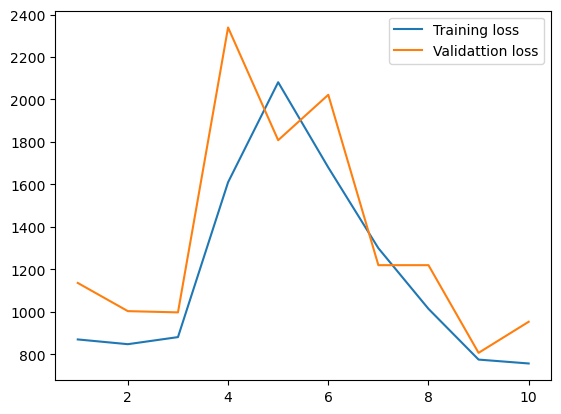

In [22]:
plt.plot(range(1,11), history.history['loss'], label = 'Training loss')
plt.plot(range(1,11), history.history['val_loss'], label = 'Validattion loss')
plt.legend()

**Prediction**

In [23]:
model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[-2.08827934e+01],
       [-6.96562500e+01],
       [ 1.54897041e+01],
       [-3.54280762e+02],
       [-3.14661011e+02],
       [-7.72986450e+01],
       [ 1.29971146e+02],
       [ 2.57352295e+02],
       [-1.19642166e+02],
       [-5.29953346e+01],
       [ 3.68576843e+02],
       [ 1.54885452e+02],
       [-3.91068878e+02],
       [ 1.08905251e+02],
       [-4.52969322e+01],
       [ 3.67896790e+02],
       [ 8.71824493e+01],
       [ 1.55268417e+02],
       [ 2.41150497e+02],
       [-2.92473755e+02],
       [-3.32386446e+00],
       [-2.28911257e+00],
       [-6.66892471e+01],
       [ 1.55249512e+02],
       [ 1.12400368e+02],
       [-7.18720398e+01],
       [-1.46941559e+02],
       [-4.41828585e+00],
       [-6.13016939e+00],
       [ 5.63308754e+01],
       [-3.91032349e+02],
       [-1.33700142e+01],
       [ 1.37299423e+02],
       [ 7.46876373e+01],
       [-1.95756363e+02],
       [-2.98588806e+02],
       [ 2.07710838e+01],
       [ 1.39494522e+02],
       [ 3.0

In [24]:
y_pred = model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


**Model Evaluation**

In [27]:
metrics.r2_score(y_test, y_pred )

0.9796910029277413